In [1]:
import pandas as pd

data = pd.read_csv("../data/design-seeds.csv")

In [2]:
data.head()

,image_path,palette_path
0,data/design-seeds-data/0.jpg,data/design-seeds-data/0.npy
1,data/design-seeds-data/1.jpg,data/design-seeds-data/1.npy
2,data/design-seeds-data/2.jpg,data/design-seeds-data/2.npy
3,data/design-seeds-data/3.jpg,data/design-seeds-data/3.npy
4,data/design-seeds-data/4.jpg,data/design-seeds-data/4.npy


In [3]:
multiplier = 21

# RecolorDataset

In [4]:
from repalette.utils.data import RecolorDataset
from matplotlib import pyplot as plt

dataset = RecolorDataset(data=data, multiplier=multiplier)

In [5]:
from torch.utils.data import DataLoader

data_loader = DataLoader(dataset, batch_size=multiplier)

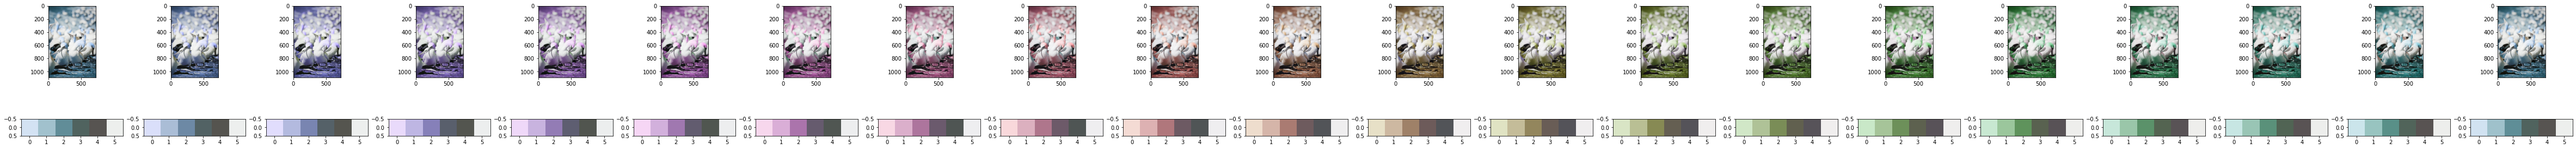

In [6]:
from skimage.color import lab2rgb

# plot first batch
batch = next(iter(data_loader))
from matplotlib import pyplot as plt
f, ax = plt.subplots(nrows=2, ncols=multiplier,  figsize=(multiplier*4, 20))
for i in range(multiplier):
    ax[0, i].imshow(lab2rgb(batch[0][i].permute(1, 2, 0)))
    ax[1, i].imshow(lab2rgb(batch[1][i].permute(1, 2, 0)))
plt.subplots_adjust(bottom=0.8, top=1)
plt.show()

# PairRecolorDataset

In [7]:
from repalette.utils.data import PairRecolorDataset

pair_dataset = PairRecolorDataset(data=data, multiplier=multiplier)

In [8]:
(img_1, palette_1), (img_2, palette_2) = next(iter(pair_dataset))

In [9]:
img_1.shape

torch.Size([3, 1088, 725])

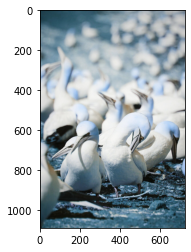

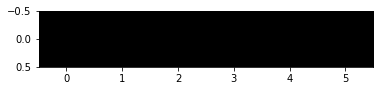

In [10]:
plt.imshow(lab2rgb(img_1.permute(1, 2, 0)))
plt.show()
plt.imshow(lab2rgb(palette_1.permute(1, 2, 0)))
plt.show()

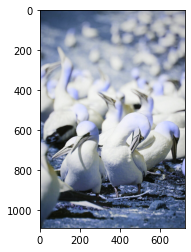

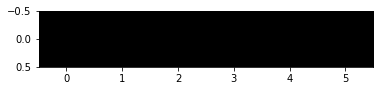

In [11]:
plt.imshow(lab2rgb(img_2.permute(1, 2, 0)))
plt.show()
plt.imshow(lab2rgb(palette_2.permute(1, 2, 0)))
plt.show()

In [12]:
len(pair_dataset)

18480